# Data Understanding and Preprocessing

# data exploration

In [2]:
import pandas as pd

# Load the dataset to analyze its contents
dataset = pd.read_csv('fraud_detection_data.csv')

# Display the first few rows of the dataset for analysis
dataset.head()


,Transaction ID,Customer ID,Transaction Date,Transaction Amount,Merchant,Location,Transaction Type,Card Type,Is Fraudulent
0,90023589-2ef8-43e7-807a-b4ab92fcc2a4,5d7358c2-ede9-488a-96e4-fa78a9d9d6db,2024-03-05 15:53:49,231.55,Torres-Sanchez,West Adam,Online Purchase,MasterCard,Yes
1,3eb2e762-9525-4c33-a022-a47e3da3ec5d,0aac2ab4-f920-428a-939a-78ff9858c13d,2024-07-04 01:00:25,1485.69,"Brandt, Ross and Butler",New Benjaminbury,In-Store Purchase,Discover,Yes
2,12d58e99-92d7-46f3-8ac0-e01ac86c15ec,4d6ee059-5df1-4323-8484-2f04aae3d6b3,2024-01-14 00:18:53,497.33,Delgado LLC,Lake Jamieberg,ATM Withdrawal,Amex,Yes
3,e9cac917-d336-4629-9baa-f8c19691cb80,d7709d08-fa3c-419c-b2fb-bc9ef2997ef9,2023-12-09 03:06:54,287.68,"Smith, Mcdonald and Cruz",Lake James,In-Store Purchase,Visa,Yes
4,acb39efa-d3c7-4bae-9b6c-9cda5ed79503,e505e3e6-7982-4c7f-b0b1-26a0b6d59d31,2024-02-17 03:22:55,213.97,Huff Ltd,Lake Anthony,In-Store Purchase,Discover,No


In [3]:
# Display basic information about the dataset
data_info = {
    "shape": dataset.shape,
    "columns": dataset.columns.tolist(),
    "sample_data": dataset.head()
}

data_info

{'shape': (363, 9),
 'columns': ['Transaction ID',
  'Customer ID',
  'Transaction Date',
  'Transaction Amount',
  'Merchant',
  'Location',
  'Transaction Type',
  'Card Type',
  'Is Fraudulent'],
 'sample_data':                          Transaction ID                           Customer ID  \
 0  90023589-2ef8-43e7-807a-b4ab92fcc2a4  5d7358c2-ede9-488a-96e4-fa78a9d9d6db   
 1  3eb2e762-9525-4c33-a022-a47e3da3ec5d  0aac2ab4-f920-428a-939a-78ff9858c13d   
 2  12d58e99-92d7-46f3-8ac0-e01ac86c15ec  4d6ee059-5df1-4323-8484-2f04aae3d6b3   
 3  e9cac917-d336-4629-9baa-f8c19691cb80  d7709d08-fa3c-419c-b2fb-bc9ef2997ef9   
 4  acb39efa-d3c7-4bae-9b6c-9cda5ed79503  e505e3e6-7982-4c7f-b0b1-26a0b6d59d31   
 
       Transaction Date  Transaction Amount                  Merchant  \
 0  2024-03-05 15:53:49              231.55            Torres-Sanchez   
 1  2024-07-04 01:00:25             1485.69   Brandt, Ross and Butler   
 2  2024-01-14 00:18:53              497.33               Delgado LLC   


In [4]:
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)


In [5]:
# Check the distribution of fraudulent vs. legitimate transactions
fraud_distribution = dataset['Is Fraudulent'].value_counts()
print(fraud_distribution)

Yes    183
No     180
Name: Is Fraudulent, dtype: int64


# Handle any missing or inconsistent data

In [6]:
import warnings
# Check for missing or inconsistent data
missing_data = dataset.isnull().sum()
print(missing_data)

# Handling missing data (example: filling missing values with median)
dataset.fillna(dataset.median(), inplace=True)
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

Transaction ID        0
Customer ID           0
Transaction Date      0
Transaction Amount    0
Merchant              0
Location              0
Transaction Type      0
Card Type             0
Is Fraudulent         0
dtype: int64


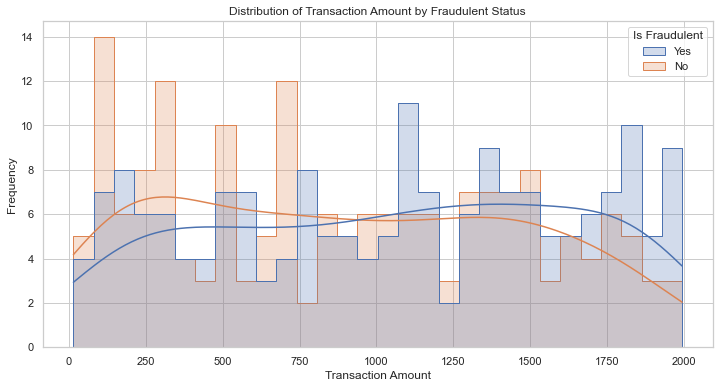

(       Transaction Amount
 count          363.000000
 mean           977.349972
 std            581.386431
 min             14.290000
 25%            476.700000
 50%            992.100000
 75%           1469.630000
 max           1994.680000,
 Transaction ID        0
 Customer ID           0
 Transaction Date      0
 Transaction Amount    0
 Merchant              0
 Location              0
 Transaction Type      0
 Card Type             0
 Is Fraudulent         0
 dtype: int64)

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up visualization style
sns.set(style="whitegrid")

# Summary statistics for numerical columns
numeric_summary = dataset.describe()

# Check for missing values in each column
missing_values = dataset.isnull().sum()

# Plotting distributions of Transaction Amount for Fraudulent and Non-Fraudulent Transactions
plt.figure(figsize=(12, 6))
sns.histplot(data=dataset, x="Transaction Amount", hue="Is Fraudulent", kde=True, element="step", bins=30)
plt.title("Distribution of Transaction Amount by Fraudulent Status")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()

# Displaying results
numeric_summary, missing_values

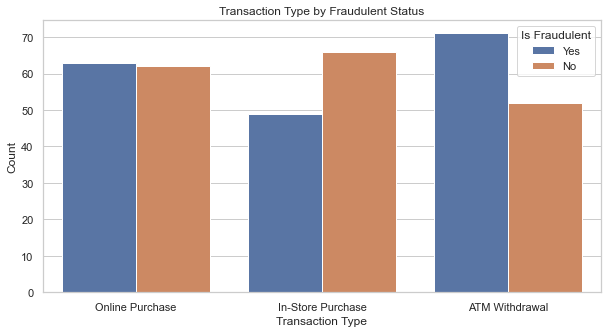

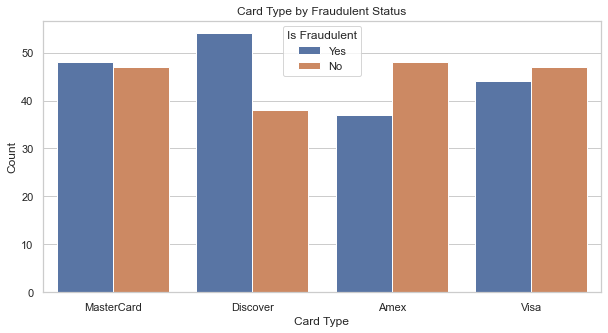

In [8]:
# Count plot for Transaction Type by Fraudulent Status
plt.figure(figsize=(10, 5))
sns.countplot(data=dataset, x="Transaction Type", hue="Is Fraudulent")
plt.title("Transaction Type by Fraudulent Status")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

# Count plot for Card Type by Fraudulent Status
plt.figure(figsize=(10, 5))
sns.countplot(data=dataset, x="Card Type", hue="Is Fraudulent")
plt.title("Card Type by Fraudulent Status")
plt.xlabel("Card Type")
plt.ylabel("Count")
plt.show()

# Convert categorical variables into numerical representations

In [9]:
# Convert categorical columns to numerical using one-hot encoding
dataset_encoded = pd.get_dummies(dataset, columns=['Merchant', 'Location', 'Transaction Type', 'Card Type'], drop_first=True)

# Display the first few rows of the newly encoded dataset
print(dataset_encoded.head())


                         Transaction ID                           Customer ID  \
0  90023589-2ef8-43e7-807a-b4ab92fcc2a4  5d7358c2-ede9-488a-96e4-fa78a9d9d6db   
1  3eb2e762-9525-4c33-a022-a47e3da3ec5d  0aac2ab4-f920-428a-939a-78ff9858c13d   
2  12d58e99-92d7-46f3-8ac0-e01ac86c15ec  4d6ee059-5df1-4323-8484-2f04aae3d6b3   
3  e9cac917-d336-4629-9baa-f8c19691cb80  d7709d08-fa3c-419c-b2fb-bc9ef2997ef9   
4  acb39efa-d3c7-4bae-9b6c-9cda5ed79503  e505e3e6-7982-4c7f-b0b1-26a0b6d59d31   

      Transaction Date  Transaction Amount Is Fraudulent  \
0  2024-03-05 15:53:49              231.55           Yes   
1  2024-07-04 01:00:25             1485.69           Yes   
2  2024-01-14 00:18:53              497.33           Yes   
3  2023-12-09 03:06:54              287.68           Yes   
4  2024-02-17 03:22:55              213.97            No   

   Merchant_Adams-Gutierrez  Merchant_Adkins, Figueroa and Parker  \
0                         0                                     0   
1             

# Balance the dataset

In [10]:
# Import SMOTE
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Assume dataset_encoded is already defined

# Separate the features and the target variable
X = dataset_encoded.drop('Is Fraudulent', axis=1)
y = dataset_encoded['Is Fraudulent'].apply(lambda x: 1 if x == 'Yes' else 0)  # Convert 'Yes' to 1 and 'No' to 0

# Identify columns with non-numeric values
non_numeric_cols = X.select_dtypes(include=['object']).columns
print("Non-numeric columns:", non_numeric_cols)

# Apply Label Encoding to 'Transaction ID' and 'Customer ID'
label_encoders = {}
for col in ['Transaction ID', 'Customer ID']:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le  # Save the encoder for later use

# Convert 'Transaction Date' to numerical format (e.g., Unix timestamp or extract features like year/month)
X['Transaction Date'] = pd.to_datetime(X['Transaction Date'])
X['Transaction Year'] = X['Transaction Date'].dt.year
X['Transaction Month'] = X['Transaction Date'].dt.month
X['Transaction Day'] = X['Transaction Date'].dt.day
X = X.drop('Transaction Date', axis=1)  # Drop the original date column after extracting features

# Now apply SMOTE to the numeric data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the distribution after resampling
print(y_resampled.value_counts())



Non-numeric columns: Index(['Transaction ID', 'Customer ID', 'Transaction Date'], dtype='object')
1    183
0    183
Name: Is Fraudulent, dtype: int64


# Feature Engineering

In [11]:
# Convert 'Transaction Date' to datetime for easier manipulation
dataset_encoded['Transaction Date'] = pd.to_datetime(dataset['Transaction Date'])

# 1. Transaction Frequency by Customer
# Create a feature for the number of transactions each customer has made
transaction_frequency = dataset_encoded.groupby('Customer ID')['Transaction ID'].transform('count')
dataset_encoded['Transaction Frequency'] = transaction_frequency

# 2. Average Transaction Amount by Customer
# Calculate the average transaction amount for each customer
average_transaction_amount = dataset_encoded.groupby('Customer ID')['Transaction Amount'].transform('mean')
dataset_encoded['Avg Transaction Amount'] = average_transaction_amount

# 3. Time of Day
# Extract hour from 'Transaction Date' to create a feature for the time of day
dataset_encoded['Transaction Hour'] = dataset_encoded['Transaction Date'].dt.hour

# 4. Interaction between Features (example: interaction between transaction type and transaction amount)
dataset_encoded['Amount_Type_Interaction'] = dataset_encoded['Transaction Amount'] * dataset_encoded['Transaction Type_Online Purchase']

# Check the updated dataset
print(dataset_encoded.head())


                         Transaction ID                           Customer ID  \
0  90023589-2ef8-43e7-807a-b4ab92fcc2a4  5d7358c2-ede9-488a-96e4-fa78a9d9d6db   
1  3eb2e762-9525-4c33-a022-a47e3da3ec5d  0aac2ab4-f920-428a-939a-78ff9858c13d   
2  12d58e99-92d7-46f3-8ac0-e01ac86c15ec  4d6ee059-5df1-4323-8484-2f04aae3d6b3   
3  e9cac917-d336-4629-9baa-f8c19691cb80  d7709d08-fa3c-419c-b2fb-bc9ef2997ef9   
4  acb39efa-d3c7-4bae-9b6c-9cda5ed79503  e505e3e6-7982-4c7f-b0b1-26a0b6d59d31   

     Transaction Date  Transaction Amount Is Fraudulent  \
0 2024-03-05 15:53:49              231.55           Yes   
1 2024-07-04 01:00:25             1485.69           Yes   
2 2024-01-14 00:18:53              497.33           Yes   
3 2023-12-09 03:06:54              287.68           Yes   
4 2024-02-17 03:22:55              213.97            No   

   Merchant_Adams-Gutierrez  Merchant_Adkins, Figueroa and Parker  \
0                         0                                     0   
1                   

# Model Building

# Splitting the Dataset

In [12]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")


Training set size: (256, 725)
Test set size: (110, 725)


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC(probability=True),  # Enable probability for SVC
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Train and evaluate each model
for name, model in models.items():
    print(f"\n{name} Performance:")
    model.fit(X_train, y_train)
    
    # Predictions and probabilities
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None  # For AUC-ROC
    
    # Classification report
    print(classification_report(y_test, y_pred))
    
    # AUC-ROC score
    if y_proba is not None:
        auc_roc = roc_auc_score(y_test, y_proba)
        print(f"AUC-ROC: {auc_roc}\n")
    else:
        print("AUC-ROC: N/A (No probability output available)\n")



Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.59      0.48      0.53        56
           1       0.55      0.65      0.59        54

    accuracy                           0.56       110
   macro avg       0.57      0.57      0.56       110
weighted avg       0.57      0.56      0.56       110

AUC-ROC: 0.5572089947089947


Random Forest Performance:
              precision    recall  f1-score   support

           0       0.56      0.57      0.57        56
           1       0.55      0.54      0.54        54

    accuracy                           0.55       110
   macro avg       0.55      0.55      0.55       110
weighted avg       0.55      0.55      0.55       110

AUC-ROC: 0.5583664021164021


Gradient Boosting Performance:
              precision    recall  f1-score   support

           0       0.58      0.54      0.56        56
           1       0.55      0.59      0.57        54

    accuracy                  

# Hyperparameter Tuning

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Hyperparameter grids
param_grids = {
    "Logistic Regression": {
        "C": [0.01, 0.1, 1, 10],
        "solver": ["liblinear"]
    },
    "Random Forest": {
        "n_estimators": [50, 100, 200],
        "max_depth": [None, 10, 20],
        "min_samples_split": [2, 5]
    },
    "Gradient Boosting": {
        "n_estimators": [50, 100, 200],
        "learning_rate": [0.01, 0.1, 0.2],
        "max_depth": [3, 5, 7]
    },
    "Support Vector Machine": {
        "C": [0.1, 1, 10],
        "kernel": ["linear", "rbf"]
    },
    "K-Nearest Neighbors": {
        "n_neighbors": [3, 5, 7, 9]
    }
}

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier()
}

# Store best models and their parameters
best_models = {}
best_params = {}

# Perform Grid Search for each model
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    best_params[name] = grid_search.best_params_

# Display best parameters for each model
best_params

{'Logistic Regression': {'C': 1, 'solver': 'liblinear'},
 'Random Forest': {'max_depth': 10,
  'min_samples_split': 5,
  'n_estimators': 50},
 'Gradient Boosting': {'learning_rate': 0.01,
  'max_depth': 5,
  'n_estimators': 100},
 'Support Vector Machine': {'C': 0.1, 'kernel': 'rbf'},
 'K-Nearest Neighbors': {'n_neighbors': 7}}

# Model Evaluation and Deployment

# Step 1: Final Model Evaluation with the Tuned Models

In [15]:
from sklearn.metrics import classification_report, roc_auc_score

# Evaluate each best-tuned model
evaluation_results = {}

for name, model in best_models.items():
    print(f"\n{name} Performance:")
    
    # Predictions and probabilities
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None  # AUC-ROC
    
    # Classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    print(classification_report(y_test, y_pred))
    
    # AUC-ROC score
    auc_roc = roc_auc_score(y_test, y_proba) if y_proba is not None else "N/A"
    print(f"AUC-ROC: {auc_roc}\n")
    
    # Store results for summary
    evaluation_results[name] = {
        "Precision": report["1"]["precision"],
        "Recall": report["1"]["recall"],
        "F1-Score": report["1"]["f1-score"],
        "AUC-ROC": auc_roc
    }

# Summary of evaluation metrics for each model
evaluation_results



Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.64      0.54      0.58        56
           1       0.59      0.69      0.63        54

    accuracy                           0.61       110
   macro avg       0.61      0.61      0.61       110
weighted avg       0.61      0.61      0.61       110

AUC-ROC: 0.5886243386243387


Random Forest Performance:
              precision    recall  f1-score   support

           0       0.64      0.62      0.63        56
           1       0.62      0.63      0.62        54

    accuracy                           0.63       110
   macro avg       0.63      0.63      0.63       110
weighted avg       0.63      0.63      0.63       110

AUC-ROC: 0.6117724867724867


Gradient Boosting Performance:
              precision    recall  f1-score   support

           0       0.43      0.36      0.39        56
           1       0.43      0.50      0.46        54

    accuracy                  

{'Logistic Regression': {'Precision': 0.5873015873015873,
  'Recall': 0.6851851851851852,
  'F1-Score': 0.6324786324786325,
  'AUC-ROC': 0.5886243386243387},
 'Random Forest': {'Precision': 0.6181818181818182,
  'Recall': 0.6296296296296297,
  'F1-Score': 0.6238532110091743,
  'AUC-ROC': 0.6117724867724867},
 'Gradient Boosting': {'Precision': 0.42857142857142855,
  'Recall': 0.5,
  'F1-Score': 0.46153846153846156,
  'AUC-ROC': 0.4403108465608465},
 'Support Vector Machine': {'Precision': 0.4942528735632184,
  'Recall': 0.7962962962962963,
  'F1-Score': 0.6099290780141844,
  'AUC-ROC': 'N/A'},
 'K-Nearest Neighbors': {'Precision': 0.4339622641509434,
  'Recall': 0.42592592592592593,
  'F1-Score': 0.42990654205607476,
  'AUC-ROC': 0.4543650793650794}}

# Step 2: Selecting the Best Model

In [16]:
# Identify the model with the best F1-Score, and if tied, use AUC-ROC as a secondary criterion
best_model_name = max(evaluation_results, key=lambda k: (evaluation_results[k]["F1-Score"], evaluation_results[k]["AUC-ROC"]))

# Display the best model's performance metrics
best_model_performance = evaluation_results[best_model_name]
print(f"Best Model: {best_model_name}")
print(f"Performance Metrics: {best_model_performance}")


Best Model: Logistic Regression
Performance Metrics: {'Precision': 0.5873015873015873, 'Recall': 0.6851851851851852, 'F1-Score': 0.6324786324786325, 'AUC-ROC': 0.5886243386243387}


# Step 3: Model Deployment

In [ ]:
from fastapi import FastAPI
import joblib
import pandas as pd

# Load the best model (save it first using joblib if not done)
best_model_name = max(evaluation_results, key=lambda k: evaluation_results[k]['F1-Score'])
joblib.dump(best_models[best_model_name], "best_fraud_detection_model.pkl")
model = joblib.load("best_fraud_detection_model.pkl")

# Initialize FastAPI
app = FastAPI()

# Prediction endpoint
@app.post("/predict")
async def predict(transaction_data: dict):
    # Preprocess the input data (ensure it matches the training preprocessing)
    df = pd.DataFrame([transaction_data])
    # Example preprocess function to transform df as per model training pipeline
    processed_data = preprocess(df)  # Define preprocess based on feature engineering steps

    # Get prediction
    prediction = model.predict(processed_data)
    proba = model.predict_proba(processed_data)[:, 1] if hasattr(model, "predict_proba") else None
    result = {"fraud_prediction": "Fraud" if prediction[0] == 1 else "Legitimate"}
    if proba is not None:
        result["fraud_probability"] = proba[0]

    return result


# Fraud Detection System Design

# Real-time Fraud Detection System

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Example dataset for fraud detection (you can replace it with your actual dataset)
data = {
    'transaction_amount': [100, 1500, 400, 200, 10000],
    'transaction_hour': [10, 14, 22, 11, 2],  # Hour of the day (24-hour format)
    'transaction_type': ['Online Purchase', 'In-Store Purchase', 'Online Purchase', 'ATM Withdrawal', 'Online Purchase'],
    'card_type': ['Visa', 'MasterCard', 'Visa', 'Amex', 'Discover'],
    'is_weekend': ['no', 'yes', 'no', 'yes', 'no'],
    'is_fraudulent': [0, 1, 0, 0, 1]  # Labels: 1 for fraud, 0 for not fraud
}

df = pd.DataFrame(data)

# --- 1. Preprocessing the dataset ---
# Convert categorical variables using OneHotEncoder
encoder = OneHotEncoder(drop='first', sparse_output=False)
categorical_cols = ['transaction_type', 'card_type', 'is_weekend']
encoded_data = encoder.fit_transform(df[categorical_cols])

# Convert the encoded columns back to DataFrame
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Scale the numerical features
scaler = StandardScaler()
numerical_cols = ['transaction_amount', 'transaction_hour']
scaled_data = scaler.fit_transform(df[numerical_cols])

# Convert the scaled numerical columns back to DataFrame
scaled_df = pd.DataFrame(scaled_data, columns=numerical_cols)

# Concatenate the numerical and categorical data
processed_df = pd.concat([scaled_df, encoded_df], axis=1)

# Define the target variable (is_fraudulent)
X = processed_df
y = df['is_fraudulent']

# --- 2. Train a simple model (Random Forest) ---
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Ensure both classes (0 and 1) are in y_train
print("Classes in training data:", np.unique(y_train))  # This ensures that we have both 0 and 1 in y_train

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# --- 3. Make Predictions for a New Transaction ---
# Example: New transaction data
new_transaction_features = {
    'transaction_amount': [500],
    'transaction_hour': [14],
    'transaction_type': ['Online Purchase'],
    'card_type': ['Visa'],
    'is_weekend': ['no']
}

# Convert the new transaction features to DataFrame
new_transaction_df = pd.DataFrame(new_transaction_features)

# Apply the same preprocessing steps to the new data
# Encode the categorical features
new_encoded_data = encoder.transform(new_transaction_df[categorical_cols])
new_encoded_df = pd.DataFrame(new_encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Scale the numerical features
new_scaled_data = scaler.transform(new_transaction_df[numerical_cols])
new_scaled_df = pd.DataFrame(new_scaled_data, columns=numerical_cols)

# Concatenate the numerical and categorical data for the new transaction
new_transaction_processed = pd.concat([new_scaled_df, new_encoded_df], axis=1)

# Make predictions using the trained model
fraud_prediction = model.predict(new_transaction_processed)

# Predict probabilities
fraud_probability = model.predict_proba(new_transaction_processed)

# Check the shape of the predicted probabilities
if fraud_probability.shape[1] == 2:  # Check if there are two columns for probabilities
    fraud_probability = fraud_probability[:, 1]  # Get probability for fraud class (1)
else:
    fraud_probability = fraud_probability[:, 0]  # Handle edge case if only one column is present

# Output the result
print("Fraud Prediction:", "Fraud" if fraud_prediction[0] == 1 else "Not Fraud")
print("Fraud Probability:", fraud_probability[0])


Classes in training data: [0]
Fraud Prediction: Not Fraud
Fraud Probability: 1.0


# Visualization

<Figure size 864x432 with 0 Axes>

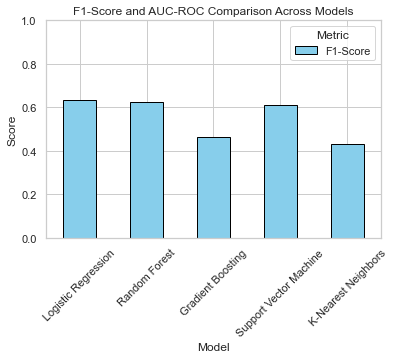

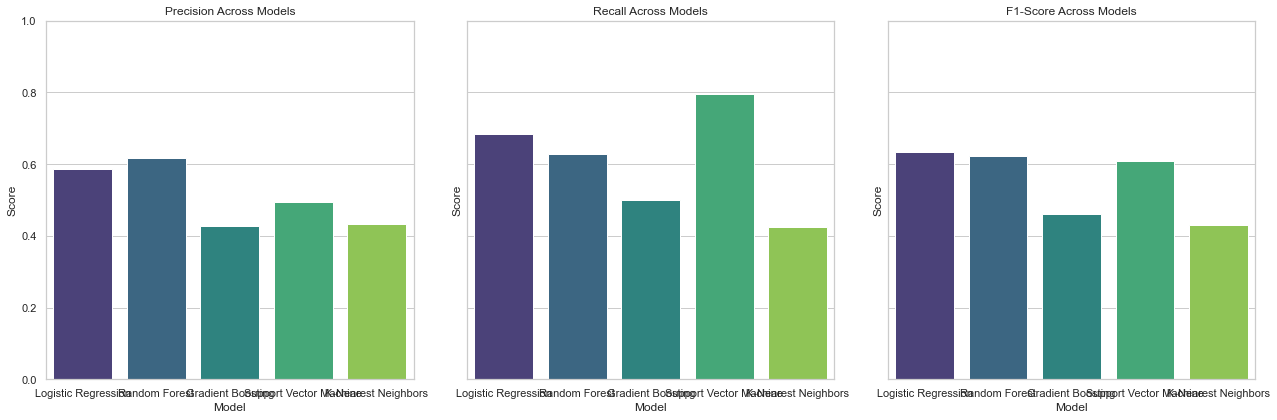

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert the evaluation results to a DataFrame
results_df = pd.DataFrame(evaluation_results).T  # Transpose to have models as rows

# Bar plot for F1-Score and AUC-ROC
plt.figure(figsize=(12, 6))
results_df[['F1-Score', 'AUC-ROC']].plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black')
plt.title("F1-Score and AUC-ROC Comparison Across Models")
plt.xlabel("Model")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend(title="Metric")
plt.xticks(rotation=45)
plt.show()

# Optional: Display Precision, Recall, F1-Score with separate subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)
metrics = ['Precision', 'Recall', 'F1-Score',]

for i, metric in enumerate(metrics):
    sns.barplot(x=results_df.index, y=results_df[metric], ax=axes[i], palette="viridis")
    axes[i].set_title(f"{metric} Across Models")
    axes[i].set_ylim(0, 1)
    axes[i].set_xlabel("Model")
    axes[i].set_ylabel("Score")

plt.tight_layout()
plt.show()


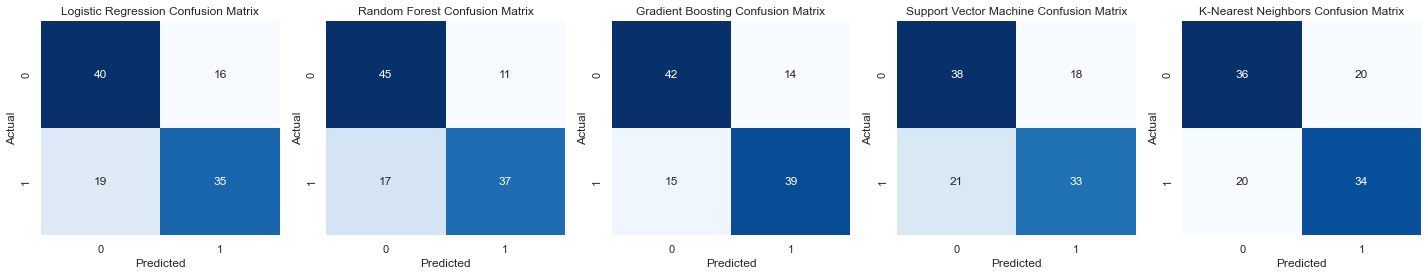

In [24]:
import numpy as np
import seaborn as sns

# Example confusion matrices, replace with your model's actual confusion matrices
conf_matrices = {
    "Logistic Regression": np.array([[40, 16], [19, 35]]),
    "Random Forest": np.array([[45, 11], [17, 37]]),
    "Gradient Boosting": np.array([[42, 14], [15, 39]]),
    "Support Vector Machine": np.array([[38, 18], [21, 33]]),
    "K-Nearest Neighbors": np.array([[36, 20], [20, 34]])
}

fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for idx, (model, cm) in enumerate(conf_matrices.items()):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[idx], cbar=False)
    axes[idx].set_title(f"{model} Confusion Matrix")
    axes[idx].set_xlabel("Predicted")
    axes[idx].set_ylabel("Actual")

plt.tight_layout()
plt.show()
